In [2]:
# loading in the stage 5 network
import pandas as pd
from ast import literal_eval
s5_network_df = pd.read_csv("data/Stage_5_PPI_predicted_features_with_clusters1.csv")

In [3]:
# Cleaning up Cluster data

# proteins which aren't in any clusters have an empty list, represented as na
print("number of na values for protein 1 clusters: ", sum(s5_network_df["Protein_1_clusters"].isna()))
print("number of na values for protein 2 clusters: ", sum(s5_network_df["Protein_2_clusters"].isna()))

na_p1_clusters = s5_network_df["Protein_1_clusters"].isna()
na_p2_clusters = s5_network_df["Protein_2_clusters"].isna()

# to clean these up, we assign empty lists to all clusters where there is an na value
s5_network_df.loc[na_p1_clusters, "Protein_1_clusters"] = pd.Series([[]] * na_p1_clusters.sum()).values
s5_network_df.loc[na_p2_clusters, "Protein_2_clusters"] = pd.Series([[]] * na_p2_clusters.sum()).values

# Verification that there are no more na values left
assert(sum(s5_network_df["Protein_1_clusters"].isna()) == 0)
assert(sum(s5_network_df["Protein_2_clusters"].isna()) == 0) 


# Function to convert string data to list represantations
def convert_data(row):
    data = row
    if type(data) == str:
        return literal_eval(data)
    else:
        return data
    
# Converting protein lists from strings to list representation
s5_network_df.loc[:, "Protein_1_clusters"] = s5_network_df.loc[:,"Protein_1_clusters"].apply(convert_data)
s5_network_df.loc[:, "Protein_2_clusters"] = s5_network_df.loc[:,"Protein_2_clusters"].apply(convert_data)

# Write out our network
s5_network_df.to_csv("data/network/stage_5_3D7.tsv", sep="\t")

print("number of na values for protein 1 clusters: ", sum(s5_network_df["Protein_1_clusters"].isna()))
print("number of na values for protein 2 clusters: ", sum(s5_network_df["Protein_2_clusters"].isna()))

number of na values for protein 1 clusters:  129
number of na values for protein 2 clusters:  83
number of na values for protein 1 clusters:  0
number of na values for protein 2 clusters:  0


In [4]:
# Graph analysis

# node properties: index, Protein1, Protein2, Description1, Descrption2
# edge properties: Score (begtween Protein1 and Protein2)
import networkx as nx
# want to import each interaction as an edge into the graph
G = nx.Graph()
G.add_edges_from(list(s5_network_df[["Protein1", "Protein2"]].itertuples(index=False)))
print(G)

# to get degree
print("Degree of A0A5K1K7U1 is ", G.degree["A0A5K1K7U1"])

# write out graph
nx.write_graphml(G, "data/network/stage5_graph.graphml")

Graph with 382 nodes and 2344 edges
Degree of A0A5K1K7U1 is  22


In [5]:
G.nodes

NodeView(('A0A5K1K7U1', 'O77396', 'Q8I0V2', 'Q8IIM8', 'O96153', 'Q7K6A9', 'P61074', 'Q8I3A1', 'C0H4C7', 'Q8IDG3', 'Q8IIX0', 'Q8ILK3', 'C6KT18', 'C6KT19', 'Q8IBS3', 'Q8IIA4', 'C0H5H0', 'O97282', 'Q8I4T3', 'Q8IBN4', 'A0A144A3N9', 'O77381', 'Q8IKK7', 'Q8ILL3', 'Q8I544', 'Q8IJ56', 'Q8ILL2', 'Q8I2X4', 'Q8II43', 'Q6ZMA7', 'Q8IL02', 'Q8IC01', 'Q8IDK7', 'A0A5K1K8V8', 'Q8IAX8', 'Q8IDG2', 'Q8IB24', 'Q8I323', 'Q8ILE3', 'K7NTP5', 'O97227', 'Q8I0X1', 'O00806', 'Q8IIB4', 'C6KT23', 'Q8IJC6', 'Q8I4U5', 'O97320', 'Q8IDB0', 'Q8IE67', 'Q8IIR8', 'Q8I463', 'Q8I3R0', 'Q8IEK3', 'Q8I2Q0', 'A0A144A1R5', 'Q8IIV2', 'Q8ILC1', 'C0H5I7', 'Q8IL58', 'Q8IIU8', 'C6KT09', 'O96252', 'Q8I2W2', 'Q8IAU7', 'O97313', 'Q8IAX6', 'Q8II61', 'Q8IEA6', 'Q8IJN9', 'Q8I5C4', 'Q8IIF0', 'Q8IKC8', 'Q8IDR9', 'Q8ILI2', 'Q8IDZ8', 'Q6ZMA8', 'Q76NM6', 'Q6ZLZ9', 'Q8IBR6', 'Q8IAX5', 'Q8IE10', 'Q8IL94', 'Q8ILS7', 'Q8IKM5', 'Q8IDF6', 'Q8ILA4', 'Q8I6T3', 'P27362', 'Q8I490', 'Q9TY99', 'Q8I5B6', 'Q8IE66', 'Q76NN6', 'Q8IIG6', 'Q8IJM0', 'Q8IJW0', 'Q8I

In [6]:
# get interacting pairs and their score
s5_network_df[["Protein1", "Protein2", "Score"]]

,Protein1,Protein2,Score
0,A0A5K1K7U1,O77396,0.999989
1,Q8I0V2,Q8IIM8,0.570148
2,O96153,Q7K6A9,0.909192
3,P61074,Q8I3A1,0.999715
4,C0H4C7,Q8IDG3,0.527092
...,...,...,...
2339,Q8I3J0,Q8IC01,0.981462
2340,C0H4A6,Q8IIA2,0.538778
2341,Q8IC01,Q8IJN9,0.802704
2342,Q8IFP3,Q8IM55,0.534147


In [7]:
# get neighbours for node by name
list(G.neighbors("A0A5K1K7U1"))

['O77396',
 'Q8IDG2',
 'Q8I261',
 'Q8II71',
 'Q8IDG3',
 'Q8IAR3',
 'Q8IKC9',
 'Q8I0U7',
 'O96153',
 'Q8IJW0',
 'Q7K6A9',
 'Q8I323',
 'Q8IK90',
 'A0A5K1K9F3',
 'Q8IJT1',
 'Q8IBI3',
 'Q8IJM0',
 'Q8IJA0',
 'C0H5H0',
 'Q8I6T3',
 'C6KST3',
 'C6KT34']

In [8]:
# Create a metadata df of network stats per gene
dict = {}
nodes = list(G.nodes)
degrees = []
for node in nodes:
    degrees.append(G.degree[node])
neighbours = []
for node in nodes:
    neighbours.append(list(G.neighbors(node)))
network_df = pd.DataFrame()
network_df.insert(0, "Accession ID", nodes)
network_df.insert(1, "Degree", degrees)
network_df.insert(2, "Neighbours", neighbours)

In [9]:
network_df

,Accession ID,Degree,Neighbours
0,A0A5K1K7U1,22,"[O77396, Q8IDG2, Q8I261, Q8II71, Q8IDG3, Q8IAR..."
1,O77396,19,"[A0A5K1K7U1, Q8IK90, Q8IJT1, Q8IAR3, Q8IAV6, Q..."
2,Q8I0V2,47,"[Q8IIM8, Q8I323, A0A5K1K9E5, Q6ZMA8, Q8IE84, Q..."
3,Q8IIM8,30,"[Q8I0V2, O00806, O97313, Q8I0P6, Q8IC43, C0H5C..."
4,O96153,18,"[Q7K6A9, Q8IK90, Q8IDG3, C6KT34, Q8IM66, Q8IKC..."
...,...,...,...
377,Q8IBG1,1,[Q7KQL5]
378,A0A5K1K8W5,2,"[Q8IKV8, Q8I0V2]"
379,O96268,1,[O97245]
380,Q7KQL2,1,[Q8IFM9]


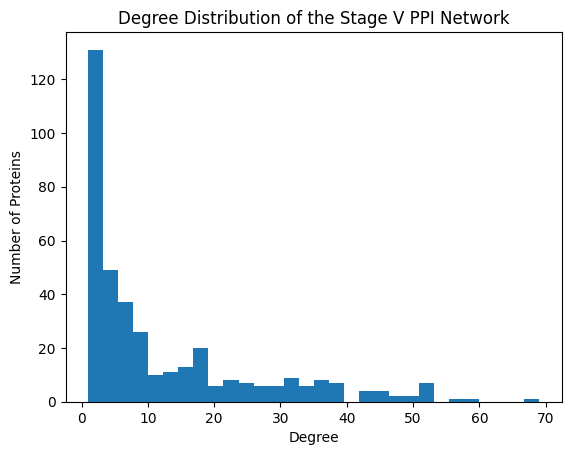

In [10]:
# Degree distributions
import matplotlib.pyplot as plt

# Get degree of all nodes (proteins)
degrees = [G.degree(n) for n in G.nodes()]

# Plot degree distribution
plt.hist(degrees, bins=30)
plt.xlabel('Degree')
plt.ylabel('Number of Proteins')
plt.title('Degree Distribution of the Stage V PPI Network')
plt.savefig("figures/s5_degree_distribution.png")
plt.show()


In [11]:
# Calculate centralities
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, 300)

print("Top Proteins by Degree Centrality:", sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
print("Top Proteins by Betweenness Centrality:", sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
print("Top Proteins by Closeness Centrality:", sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
print("Top Proteins by Eigenvector Centrality:", sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10])

Top Proteins by Degree Centrality: [('C0H5H0', 0.18110236220472442), ('Q8IAX5', 0.15223097112860892), ('Q8IM10', 0.14698162729658792), ('Q8I323', 0.13910761154855644), ('Q8IDR9', 0.13910761154855644), ('C0H5C2', 0.13648293963254593), ('K7NTP5', 0.13385826771653542), ('Q8IJC6', 0.13385826771653542), ('O97313', 0.13385826771653542), ('Q8I0P6', 0.13385826771653542)]
Top Proteins by Betweenness Centrality: [('C0H5H0', 0.1485603329099958), ('Q76NN6', 0.11770073483764357), ('Q8II61', 0.06537808219355956), ('Q8I0V2', 0.06014766148003809), ('Q8I323', 0.053807554346528265), ('Q8II24', 0.04788576968801625), ('Q8IKW5', 0.045072141882243386), ('Q8IFP3', 0.041258141787637995), ('Q7KQL5', 0.03834371268376866), ('Q8IAX5', 0.03388450688340374)]
Top Proteins by Closeness Centrality: [('C0H5H0', 0.44532680366173744), ('Q8IKW5', 0.42860091432232944), ('Q8IAX5', 0.42610032555732164), ('K7NTP5', 0.4226481238456304), ('Q8I323', 0.4216720311808599), ('Q8IB24', 0.41685842351897795), ('Q8IM10', 0.4168584235189

In [12]:
network_df.insert(3, "Degree Centrality", degree_centrality.values()) # note: degree centrality calculated with 
network_df.insert(4, "Betweenness Centrality", betweenness_centrality.values())
network_df.insert(5, "Closeness Centrality", closeness_centrality.values())
network_df.insert(6, "Eigenvector Centrality", eigenvector_centrality.values())


In [13]:
# to display by ordering of column
network_df.sort_values(by="Betweenness Centrality", ascending=False, inplace=False)

,Accession ID,Degree,Neighbours,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality
16,C0H5H0,69,"[O97282, Q8II43, Q8IFP3, Q8ILP6, C6KST3, Q8IEK...",0.181102,0.148560,0.445327,0.089267
93,Q76NN6,45,"[Q8IIG6, C0H586, Q8I3J0, Q8I608, Q8I3A1, O9728...",0.118110,0.117701,0.364439,0.013184
67,Q8II61,42,"[Q8IIV2, Q8IDZ8, Q8IKM5, Q8IIU8, Q8IKH8, Q76NN...",0.110236,0.065378,0.414493,0.121061
2,Q8I0V2,47,"[Q8IIM8, Q8I323, A0A5K1K9E5, Q6ZMA8, Q8IE84, Q...",0.123360,0.060148,0.414023,0.117971
37,Q8I323,53,"[Q8ILE3, Q76NM6, Q8IKB2, Q8I0V2, Q8I280, Q8ILI...",0.139108,0.053808,0.421672,0.089794
...,...,...,...,...,...,...,...
279,Q8IKQ9,1,[Q8I463],0.002625,0.000000,0.250458,0.001287
278,A0A144A0F5,1,[Q76NN6],0.002625,0.000000,0.265770,0.000409
277,Q8IKJ0,1,[Q8IBV7],0.002625,0.000000,0.264232,0.002557
274,Q8IAV6,1,[O77396],0.002625,0.000000,0.223071,0.000308


In [14]:
# integrate additional info 

# break down degree by essential vs dispensable proteins, get from piggyback transposon or plasmoDB, hyperLopit 
# predicted compartment, calculate average degree of essential proteins vs nonessential proteins
# subcellular localization from hyperlopit dataset, can use plasmodb, same for essential proteins vs nonessential proteins

In [15]:
# Clustering coefficient (measures protein local connectivity)
clustering_coeffs = nx.clustering(G)
average_clustering = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {average_clustering}")

# Community detection using Girvan-Newman
from networkx.algorithms.community import girvan_newman

communities = girvan_newman(G)
first_community = next(communities)
print(f"First Community Split: {first_community}")

Average Clustering Coefficient: 0.3824511427514054
First Community Split: ({'Q8IL80', 'A0A5K1K7U1', 'Q76NN6', 'Q7KQK0', 'Q8I274', 'Q8IDG2', 'Q8I3J0', 'O97282', 'Q7KQK6', 'Q8IC01', 'Q8ID28', 'Q8IDR9', 'Q8ILZ1', 'C6S3G2', 'Q8I5Q3', 'Q8IIJ6', 'Q8I544', 'Q8ILI6', 'Q8I0V2', 'Q8IAW0', 'Q8IIX5', 'B9ZSJ2', 'Q76NM6', 'Q76NN7', 'Q8IIB6', 'Q8IIT3', 'Q8IK83', 'O97245', 'Q8I5M9', 'Q8IJX8', 'Q8IJS2', 'Q8ILT0', 'Q8II60', 'Q7KQL2', 'Q8IJA9', 'Q8ILZ7', 'Q8IBN4', 'Q8IHN4', 'C6KTA3', 'Q8I374', 'Q8II42', 'Q8I5C4', 'O77396', 'Q8IJI7', 'O97249', 'Q8IDK7', 'P61076', 'Q8IM55', 'Q8I487', 'O96221', 'Q8IIB4', 'Q8I484', 'C0H4A6', 'Q8IKT2', 'Q8IAY9', 'Q8I3X4', 'C0H4W2', 'Q8I3Y6', 'Q8I3I6', 'Q8IL94', 'P27362', 'Q7K6A5', 'Q8IB60', 'C6KT19', 'Q8IJ60', 'Q8IM24', 'C0H5H0', 'Q8IJM9', 'Q8IM03', 'Q8IEP9', 'A0A144A0F5', 'Q8I3A4', 'Q8I1S0', 'Q8IL02', 'Q8ILC1', 'Q8IDJ8', 'C6KT76', 'A0A143ZZK9', 'Q8IJM0', 'Q8IIR7', 'Q8I669', 'Q8IBY4', 'Q8IJW0', 'C6KTB3', 'Q7KQL9', 'Q8I0U7', 'Q8IB24', 'Q8IBB9', 'Q8IIF0', 'Q8ILF4', 'Q8ILB6', 'Q

In [16]:
def manual_closeness_centrality(G, node):
    # Step 1: Get the total number of nodes
    N = len(G.nodes)
    
    # Step 2: Compute the shortest path distances from the given node to all other nodes
    shortest_paths = nx.shortest_path_length(G, source=node)
    
    # Step 3: Sum the shortest path distances
    total_shortest_path_length = sum(shortest_paths.values())
    
    # Step 4: Use the formula to compute closeness centrality
    if total_shortest_path_length > 0 and N > 1:
        closeness_centrality = (N - 1) / total_shortest_path_length
    else:
        # In case the graph is disconnected, return 0
        closeness_centrality = 0
    
    return closeness_centrality
manual_closeness_centrality(G, "K7NTP5")

0.4409722222222222

In [17]:
essentiality_df = pd.read_csv("data/falciparum_3D7+knowlesi.tsv", delimiter='\t')
c = essentiality_df.columns
essentiality_df.columns
renamed_columns = {'P.falciparum 3D7 piggyBac insertion mutagenesis - mutant fitness score': '3D7_MFS',
                                'P.falciparum 3D7 piggyBac insertion mutagenesis - mutagenesis index score': '3D7_MIS',
                                'P.knowlesi strain AIHI piggyBac mutagenesis - MIS score': 'AIHI_MIS',
                                'P.knowlesi strain AIHI piggyBac mutagenesis - MFS score': 'AIHI_MFS'
                                }
essentiality_df.rename(columns=renamed_columns, inplace=True)
essentiality_df.columns

Index(['Gene ID', 'source_id', 'Organism', 'Genomic Location (Gene)',
       'Product Description', '3D7_MFS', '3D7_MIS', 'SignalP Peptide',
       '# TM Domains',
       'P.knowlesi strain H piggyBac mutagenesis - Occupancy index score',
       'P.knowlesi strain H piggyBac mutagenesis - Hybrid model score',
       'P.knowlesi strain AIHI piggyBac mutagenesis - mutability', 'AIHI_MIS',
       'P.knowlesi strain AIHI piggyBac mutagenesis - MIS plus score',
       'AIHI_MFS'],
      dtype='object')

In [18]:
# drop all columns that have all values as na (which happened to be all knowlesi scores)
essentiality_df.dropna(axis=1, how='all', inplace=True)
# essentiality_df.dropna(subset=['3D7_MFS', '3D7_MIS'])

In [19]:
essentiality_df.count(0)

Gene ID                    5791
source_id                  5791
Organism                   5791
Genomic Location (Gene)    5791
Product Description        5791
3D7_MFS                    5456
3D7_MIS                    5456
SignalP Peptide             609
# TM Domains               5389
dtype: int64

In [20]:
essentiality_df['essential'] = essentiality_df["3D7_MIS"] < 0.25

In [21]:
# sort the df by MIS value
essentiality_df.sort_values(['3D7_MIS'], inplace=True)

In [22]:
# read in plasmoDB gene IDs mapped to Accessions
temp = pd.read_csv("data/GenesByTaxon_Alias.csv")
# Merge dataframes
temp = essentiality_df.merge(temp, on=["Gene ID"])
temp = temp.merge(network_df, left_on=["Name/ID/Alias"], right_on=["Accession ID"])
# Drop unneeded columns
temp.drop(["Organism", "Type", "Source", "Name/ID/Alias", "SignalP Peptide", "# TM Domains"], axis=1, inplace=True)
# drop duplicates
temp.drop_duplicates(["Accession ID"], inplace=True)

In [23]:
temp

,Gene ID,source_id,Genomic Location (Gene),Product Description,3D7_MFS,3D7_MIS,essential,Accession ID,Degree,Neighbours,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality
0,PF3D7_0608500,PF3D7_0608500.1,"Pf3D7_06_v3:350,697..353,774(-)","proteasome subunit alpha type-2, putative",-3.100,0.119,True,C6KST3,34,"[O77323, O97247, Q8I0U7, C0H5H0, O96220, Q8I2X...",0.089239,0.004398,0.353161,0.025594
1,PF3D7_0320300,PF3D7_0320300.1,"Pf3D7_03_v3:844,881..848,142(+)",T-complex protein 1 subunit epsilon,-3.368,0.119,True,O97282,39,"[C0H5H0, Q8I6T3, Q8II43, Q8IDZ8, Q6ZLZ9, Q8IFP...",0.102362,0.016749,0.396061,0.037224
2,PF3D7_1464700,PF3D7_1464700.1,"Pf3D7_14_v3:2,624,850..2,627,233(-)","ATP synthase (C/AC39) subunit, putative",-3.121,0.119,True,Q8IKJ0,1,[Q8IBV7],0.002625,0.000000,0.264232,0.002557
3,PF3D7_1366500,PF3D7_1366500.1,"Pf3D7_13_v3:2,660,521..2,662,797(+)",nucleoside diphosphate kinase,-2.705,0.119,True,Q8ID43,15,"[Q6ZLZ9, Q8IDF6, Q8IJN9, Q7KQL9, Q8ILA4, Q8IL5...",0.039370,0.005608,0.346459,0.013444
4,PF3D7_1126000,PF3D7_1126000.1,"Pf3D7_11_v3:1,013,901..1,017,911(-)",threonine--tRNA ligase,-2.949,0.119,True,Q8IIA4,7,"[Q8IBS3, Q8IE10, Q8IDK7, Q8IDZ9, Q8ILP6, Q8IAX...",0.018373,0.008290,0.312109,0.014296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,PF3D7_1204300,PF3D7_1204300.1,"Pf3D7_12_v3:204,215..207,469(-)",eukaryotic translation initiation factor 5A,0.000,1.000,False,Q8I603,6,"[Q8IKH8, C0H5C2, Q8I5Q3, A0A5K1K8V8, K7NTP5, Q...",0.015748,0.005109,0.311843,0.021922
382,PF3D7_1237900,PF3D7_1237900.1,"Pf3D7_12_v3:1,577,146..1,581,262(+)","conserved Plasmodium protein, unknown function",-0.820,1.000,False,Q8I544,3,"[Q8IJ56, B9ZSJ2, Q8I2G1]",0.007874,0.003909,0.250286,0.001453
383,PF3D7_1250100,PF3D7_1250100.1,"Pf3D7_12_v3:2,045,070..2,054,429(-)",osmiophilic body protein G377,-0.976,1.000,False,Q8I4T3,10,"[Q8IBN4, Q8I0U8, C0H571, Q8IIX5, Q8IJ76, B9ZSJ...",0.026247,0.001186,0.284399,0.004019
384,PF3D7_0518700,PF3D7_0518700.1,"Pf3D7_05_v3:774,052..780,916(-)",mRNA-binding protein PUF1,-1.712,1.000,False,Q8I3S3,1,[Q8ILZ7],0.002625,0.000000,0.226110,0.000218


In [24]:
essential_mean_degree = temp[temp["essential"]]["Degree"].mean()
nonessential_mean_degree = temp[temp["essential"] == False]["Degree"].mean()
print(essential_mean_degree)
print(nonessential_mean_degree)

14.116161616161616
10.28804347826087


In [25]:
# get the values where essential is true
temp[temp["essential"]].head()

,Gene ID,source_id,Genomic Location (Gene),Product Description,3D7_MFS,3D7_MIS,essential,Accession ID,Degree,Neighbours,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality
0,PF3D7_0608500,PF3D7_0608500.1,"Pf3D7_06_v3:350,697..353,774(-)","proteasome subunit alpha type-2, putative",-3.100,0.119,True,C6KST3,34,"[O77323, O97247, Q8I0U7, C0H5H0, O96220, Q8I2X...",0.089239,0.004398,0.353161,0.025594
1,PF3D7_0320300,PF3D7_0320300.1,"Pf3D7_03_v3:844,881..848,142(+)",T-complex protein 1 subunit epsilon,-3.368,0.119,True,O97282,39,"[C0H5H0, Q8I6T3, Q8II43, Q8IDZ8, Q6ZLZ9, Q8IFP...",0.102362,0.016749,0.396061,0.037224
2,PF3D7_1464700,PF3D7_1464700.1,"Pf3D7_14_v3:2,624,850..2,627,233(-)","ATP synthase (C/AC39) subunit, putative",-3.121,0.119,True,Q8IKJ0,1,[Q8IBV7],0.002625,0.000000,0.264232,0.002557
3,PF3D7_1366500,PF3D7_1366500.1,"Pf3D7_13_v3:2,660,521..2,662,797(+)",nucleoside diphosphate kinase,-2.705,0.119,True,Q8ID43,15,"[Q6ZLZ9, Q8IDF6, Q8IJN9, Q7KQL9, Q8ILA4, Q8IL5...",0.039370,0.005608,0.346459,0.013444
4,PF3D7_1126000,PF3D7_1126000.1,"Pf3D7_11_v3:1,013,901..1,017,911(-)",threonine--tRNA ligase,-2.949,0.119,True,Q8IIA4,7,"[Q8IBS3, Q8IE10, Q8IDK7, Q8IDZ9, Q8ILP6, Q8IAX...",0.018373,0.008290,0.312109,0.014296


In [26]:
# determining significance of mean values
import numpy as np
import scipy.stats as stats
np.var(temp[temp["essential"]]["Degree"])
# ttest between degrees of essential and nonessential proteins 
stats.ttest_ind(temp[temp["essential"]]["Degree"], temp[temp["essential"] == False]["Degree"])
# stats.ttest_ind(temp[temp["essential"]]["Betweenness Centrality"], temp[temp["essential"] == False]["Betweenness Centrality"])

TtestResult(statistic=np.float64(2.7423889984656915), pvalue=np.float64(0.006387976236605434), df=np.float64(380.0))

In [27]:
# normalized degree data
temp["Degree_norm"] = (temp["Degree"] - temp["Degree"].mean()) / (temp["Degree"].max() - temp["Degree"].min())

In [28]:
# get degree of nonessential values
temp[temp["essential"] == False]["Degree"]
# get variance of nonessential values
np.var(temp[temp["essential"] == False]["Degree"])

np.float64(141.0420309546314)

In [29]:
# determining significance of mean values
import numpy as np
import scipy.stats as stats
np.var(temp[temp["essential"]]["Degree"])
# ttest between degrees of essential and nonessential proteins 
stats.ttest_ind(temp[temp["essential"]]["Degree"], temp[temp["essential"] == False]["Degree"], equal_var=False)
# stats.ttest_ind(temp[temp["essential"]]["Betweenness Centrality"], temp[temp["essential"] == False]["Betweenness Centrality"])
essential_degrees = temp[temp["essential"]]["Degree"]
nonessential_degrees = temp[temp["essential"] == False]["Degree"]

In [30]:
# reorder columns and save csv
temp.loc[:, ["Accession ID", "Gene ID", "Product Description", "3D7_MIS", "3D7_MFS", "Neighbours", 
             "essential", "Degree", "Betweenness Centrality", 
             "Closeness Centrality"]].to_csv("data/generated_tables/s5_essentiality_df.tsv", sep="\t")

In [31]:
def welch_dof(x,y):
        dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
        print(f"Welch-Satterthwaite Degrees of Freedom = {dof:.4f}")
welch_dof(essential_degrees, nonessential_degrees)

Welch-Satterthwaite Degrees of Freedom = 370.6662


In [32]:
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")

welch_ttest(essential_degrees, nonessential_degrees)


 Welch's t-test= 2.7657 
 p-value = 0.0060 
 Welch-Satterthwaite Degrees of Freedom= 370.6662


## Correlation Analysis

In [33]:
# TODO: Download data for different 3D7 models in different stages of life cycle
    
# TODO: Calculate Spearman and Pearson correlation coefficients across interacting pairs
# we get the pairs of interacting genes from our current model

# TODO: Merge these into one so that a primary key is a pair of interacting genes and we have correlation
# coefficients across the different models

# TODO: Calculate correlation coefficients for non-interacting pairs

In [34]:
# function to add uniprot accessions to rnaseq dataframes
def append_uniprot_alias(rnaseq_file, alias_file: str="data/GenesByTaxon_Alias.csv") -> pd.DataFrame:
    """
    supply rnaseq file path and alias file path
    returns dataframe of the rnaseq file with accession id appended
    """
    aliases = pd.read_csv(alias_file)
    df = pd.read_csv(rnaseq_file, delimiter='\t')
    # merge on common column Gene ID
    df = df.merge(aliases, on="Gene ID")
    # take inner join of df and network_df to get aliases only found in network_df
    df = df.merge(network_df["Accession ID"], left_on=["Name/ID/Alias"], right_on=["Accession ID"])
    df.drop(["Type", "Source", "Name/ID/Alias", "Gene ID", "source_id"], axis=1, inplace=True)
    return df

In [35]:
gametocyte_df = append_uniprot_alias("data/rnaseq/3D7 Gametocyte Transcriptomes.tsv")

In [36]:
# erythrocyte_df = append_uniprot_alias("data/rnaseq/falciparum_erythrocitic_rnaseq.tsv")
erythrocyte_df = append_uniprot_alias("data/rnaseq/3D7_postinvasion_erythrocyte.tsv")

In [37]:
interaction_pairs = s5_network_df[["Protein1", "Protein2"]]

In [38]:
from scipy.stats import spearmanr
def compute_spearman(df: pd.DataFrame, protein1: str, protein2: str) -> int:
    # get all except for last column
    try:
        rnaseq1 = list(df[df["Accession ID"] == protein1].iloc[:,:-1].values[0])
        rnaseq2 = list(df[df["Accession ID"] == protein2].iloc[:,:-1].values[0])
        result = spearmanr(rnaseq1, rnaseq2)
        return result
    except:
        print(protein1)
        print(protein2)
    
    
    

def compute_row_spearman(row, df): 
    """
    Wrapper function to compute spearman across a df row.
    Assumes there is protein1 and protein2 columns in dataframe.
    """
    protein1 = row["Protein1"]
    protein2 = row["Protein2"]
    return compute_spearman(df, protein1, protein2)[0]



In [39]:
tmp = erythrocyte_df.drop("Accession ID", axis=1).values[0]
erythrocyte_df[erythrocyte_df["Accession ID"] == "C0H4A6"]

,sense - 2-10 hours post-invasion,sense - 40-5 hours post-invasion,sense - 7-15 hours post-invasion,sense - 12-20 hours post-invasion,sense - 17-25 hours post-invasion,sense - 22-30 hours post-invasion,sense - 27-35 hours post-invasion,sense - 32-40 hours post-invasion,Accession ID
292,1506.75,325.58,2221.56,2753.94,2724.49,2327.34,1723.54,1110.01,C0H4A6


In [40]:
from scipy.stats import pearsonr
def compute_pearson(df: pd.DataFrame, protein1: str, protein2: str) -> int:
    # get all except for last column
    rnaseq1 = list(df[df["Accession ID"] == protein1].iloc[:,:-1].values[0])
    rnaseq2 = list(df[df["Accession ID"] == protein2].iloc[:,:-1].values[0])
    return pearsonr(rnaseq1, rnaseq2)

def compute_row_pearson(row, df, pvalue_flag=False): 
    """
    Wrapper function to compute spearman across a df row.
    Assumes there is protein1 and protein2 columns in dataframe.
    """
    protein1 = row["Protein1"]
    protein2 = row["Protein2"]
    return compute_pearson(df, protein1, protein2)[pvalue_flag]

In [41]:
erythrocyte_df[erythrocyte_df["Accession ID"] == "Q8IBG1"]

,sense - 2-10 hours post-invasion,sense - 40-5 hours post-invasion,sense - 7-15 hours post-invasion,sense - 12-20 hours post-invasion,sense - 17-25 hours post-invasion,sense - 22-30 hours post-invasion,sense - 27-35 hours post-invasion,sense - 32-40 hours post-invasion,Accession ID
157,1.1,1.44,0.93,0.46,0.3,0.43,0.41,0.81,Q8IBG1


In [42]:
# generate a df to keep track of correlation values across datasets
pairs_correlation_df = pd.DataFrame(interaction_pairs)
# pairs_correlation_df["spearman_erythrocyte"] = pairs_correlation_df.apply(compute_row_spearman, args=(erythrocyte_df,), axis=1)
pairs_correlation_df.head(5)

,Protein1,Protein2
0,A0A5K1K7U1,O77396
1,Q8I0V2,Q8IIM8
2,O96153,Q7K6A9
3,P61074,Q8I3A1
4,C0H4C7,Q8IDG3


In [43]:
s5_network_df.head()

,index,Protein1,Protein2,Score,Description1,Description2,Protein_1_clusters,Protein_2_clusters,Any Matching Go-Terms?,Train/Val/Test,Experimental P. Falciparum,P. Falciparum,P. Knowlesi,P. Berghei,P. Vivax,P. Yoelii,C. parvum,B. bovis
0,0,A0A5K1K7U1,O77396,0.999989,Proteasome subunit beta,"Proteasome subunit alpha type-3, putative",[5],[5],1,1,1,1,1,1,1,1,1,1
1,1,Q8I0V2,Q8IIM8,0.570148,ATP synthase subunit beta,"Ubiquitin domain-containing protein DSK2, puta...","[2, 59]",[2],0,0,0,0,0,0,0,1,0,0
2,2,O96153,Q7K6A9,0.909192,"26S proteasome regulatory subunit RPN1, putative",Proteasome subunit beta,[5],[5],0,1,1,1,1,1,1,1,1,1
3,3,P61074,Q8I3A1,0.999715,Proliferating cell nuclear antigen 1,"Replication protein A1, small","[28, 66]","[28, 36, 66]",0,1,1,1,0,1,1,1,1,1
4,4,C0H4C7,Q8IDG3,0.527092,Mediator of RNA polymerase II transcription su...,Proteasome subunit alpha type,"[5, 30]",[5],0,0,0,0,0,0,0,0,0,0


In [44]:
pairs_correlation_df.head()

,Protein1,Protein2
0,A0A5K1K7U1,O77396
1,Q8I0V2,Q8IIM8
2,O96153,Q7K6A9
3,P61074,Q8I3A1
4,C0H4C7,Q8IDG3


In [45]:
# function to graph spearman correlation curve
import numpy as np
import seaborn as sns
def plot_spearman(df, col_name):
    data = df[col_name]
    sns.set_style('whitegrid')
    sns.kdeplot(np.array(data), bw=0.5)

In [46]:
# Make all combinations of pairs of proteins in network
from itertools import combinations
# get unique genes from our network (each gene is a node)
unique_genes = set(G.nodes)
all_pairs = combinations(unique_genes, 2)
combos = set()
for combo in all_pairs:
    combos.add(combo)
    
# Create a dataframe of all non-interacting pairs of proteins
pairs = []
pairs.extend(interaction_pairs.apply(lambda row: (row['Protein1'], row['Protein2']), axis=1).to_list())
pairs.extend(interaction_pairs.apply(lambda row: (row['Protein2'], row['Protein1']), axis=1).to_list())
nonpairs = combos.difference(set(pairs))
nonpairs_correlation_df = pd.DataFrame(nonpairs, columns=["Protein1", "Protein2"])

In [47]:
allpairs_correlation_df = pd.DataFrame(combos, columns=["Protein1", "Protein2"])

In [48]:
tmp_df = ""
def compute_df(file_path: str, df: pd.DataFrame, col_name: str):
    tmp_df = append_uniprot_alias(file_path)
    df[col_name] = df.apply(compute_row_spearman, args=[tmp_df], axis=1)

In [49]:
# Spearman calculations for all interacting and non-interacting pairs
# 7 stages dataset
# print("assessing 7 stages dataset...")
# seven_stages_df = append_uniprot_alias("data/rnaseq/3D7_7stages.tsv")
# pairs_correlation_df["7_stages"] = pairs_correlation_df.apply(compute_row_spearman, args=[seven_stages_df], axis=1)
# nonpairs_correlation_df["7_stages"] = nonpairs_correlation_df.apply(compute_row_spearman, args=[seven_stages_df], axis=1)

# # intraerythrocitic
# print("assessing intraerythrocitic dataset...")
# intra_df = append_uniprot_alias("data/rnaseq/3D7_intraerythrocytic_dev.txt")
# pairs_correlation_df["intraerythrocyte_cycle"] = pairs_correlation_df.apply(compute_row_spearman, args=[intra_df], axis=1)
# nonpairs_correlation_df["intraerythrocyte_cycle"] = nonpairs_correlation_df.apply(compute_row_spearman, args=[intra_df], axis=1)

# # Blood
# print("assessing blood dataset...")
# blood_df = append_uniprot_alias("data/rnaseq/3D7_blood.txt")
# pairs_correlation_df["blood_stages"] = pairs_correlation_df.apply(compute_row_spearman, args=[blood_df], axis=1)
# nonpairs_correlation_df["blood_stages"] = nonpairs_correlation_df.apply(compute_row_spearman, args=[blood_df], axis=1)

# All rnaseq datasets combined
print("assessing concatenated dataset...")
all_df = append_uniprot_alias("data/rnaseq/3D7_all_intraerythrocytic.txt")
pairs_correlation_df["Spearman_all"] = pairs_correlation_df.apply(compute_row_spearman, args=[all_df], axis=1)
nonpairs_correlation_df["Spearman_all"] = nonpairs_correlation_df.apply(compute_row_spearman, args=[all_df], axis=1)
# allpairs_correlation_df["Spearman_all"] = allpairs_correlation_df.apply(compute_row_pearson, args=[all_df], axis=1)

assessing concatenated dataset...


In [50]:
# Pearson calculations for all interacting and non-interacting pairs
pairs_correlation_df["Pearson_all"] = pairs_correlation_df.apply(compute_row_pearson, args=[all_df], axis=1)
nonpairs_correlation_df["Pearson_all"] = nonpairs_correlation_df.apply(compute_row_pearson, args=[all_df], axis=1)
# allpairs_correlation_df["Pearson_all"] = allpairs_correlation_df.apply(compute_row_pearson, args=[all_df], axis=1)

In [51]:
pairs_correlation_df.to_csv("data/generated_tables/s5_interacting_pairs_correlation.tsv", sep="\t")

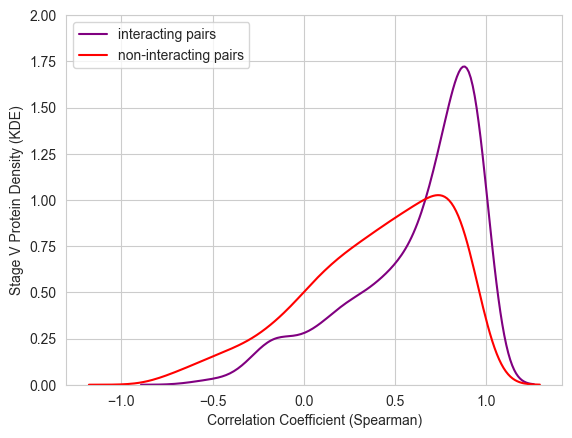

In [52]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Set the plot style
sns.set_style('whitegrid')

# Create the KDE plots
# 7 stages
# sns.kdeplot(np.array(pairs_correlation_df["7_stages"]), bw_method=0.5, color='red', label="7_stages")
# sns.kdeplot(np.array(nonpairs_correlation_df["7_stages"]), bw_method=0.5, color='red', label="nonpairs_7_stages")

# # intraerythrocitic cycle
# sns.kdeplot(np.array(pairs_correlation_df["intraerythrocyte_cycle"]), bw_method=0.5, color='purple', label="intraerythrocyte_cycle")
# sns.kdeplot(np.array(nonpairs_correlation_df["intraerythrocyte_cycle"]), bw_method=0.5, color='purple', label="np_intraerythrocyte_cycle")

# sns.kdeplot(np.array(pairs_correlation_df["spearman_erythrocyte"]), bw_method=0.5, color='blue', label="spearman_erythrocyte")

# sns.kdeplot(np.array(pairs_correlation_df["blood_stages"]), bw_method=0.5, color='green', label="blood_stages")

# All rnaseq data combined
sns.kdeplot(np.array(pairs_correlation_df["Spearman_all"]), bw_method=0.5, bw_adjust=0.5, color='purple', label="interacting pairs")
# sns.kdeplot(np.array(nonpairs_correlation_df["Spearman_all"]), bw_method=0.5, bw_adjust=0.5, color='orange', label="all non pairs")
sns.kdeplot(np.array(nonpairs_correlation_df["Spearman_all"]), bw_method=0.5, bw_adjust=0.5, color='red', label="non-interacting pairs")
# Set axis labels and plot title
plt.xlabel("Correlation Coefficient (Spearman)")  
plt.ylabel("Stage V Protein Density (KDE)")                 
# plt.title("Density Plot of Spearman Correlation Coefficient Distribution \n for Interacting Pairs vs. Non-Interacting Pairs in Stage 5 PPI") 

plt.ylim(0, 2)
# Add a legend
plt.legend()
plt.savefig("figures/all_stage_5_spearman_density")


# Show the plot
plt.show()


In [53]:
# pass in interacting pairs and non-interactings coefficients in kstest, vectors don't have to be same size
spearman_ks = stats.kstest(pairs_correlation_df["Spearman_all"], nonpairs_correlation_df["Spearman_all"])
print("Spearman KS test statistic: \t", spearman_ks[0])
print("Spearman KS test p-value: \t", spearman_ks[1])

Spearman KS test statistic: 	 0.2619914487011967
Spearman KS test p-value: 	 7.557786747296917e-138


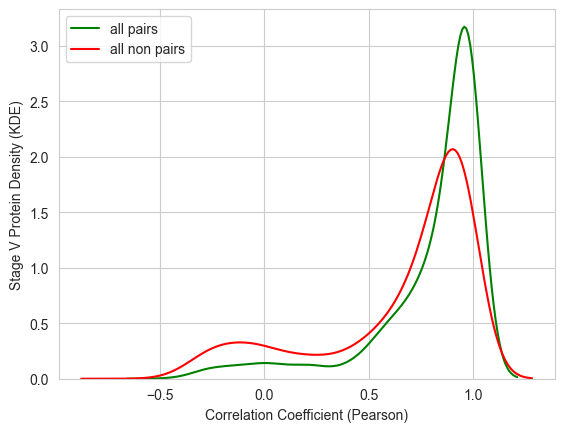

In [54]:
# All rnaseq data combined
sns.kdeplot(np.array(pairs_correlation_df["Pearson_all"]), bw_method=0.5, bw_adjust=0.5, color='green', label="all pairs")
sns.kdeplot(np.array(nonpairs_correlation_df["Pearson_all"]), bw_method=0.5, bw_adjust=0.5, color='red', label="all non pairs")
# Set axis labels and plot title
plt.xlabel("Correlation Coefficient (Pearson)")  
plt.ylabel("Stage V Protein Density (KDE)")                 
# plt.title("Density Plot of Pearson Correlation Coefficient Distribution \n for Interacting Pairs vs. Non-Interacting Pairs in Stage 5 PPI") 

# Add a legend
plt.legend()
plt.savefig("figures/all_stage_5_pearson_density")

# Show the plot
plt.show()

In [55]:
# pass in interacting pairs and non-interactings coefficients in kstest, vectors don't have to be same size
spearman_ks = stats.kstest(pairs_correlation_df["Pearson_all"], nonpairs_correlation_df["Pearson_all"], alternative="less")
print("Spearman KS test statistic: \t", spearman_ks[0])
print("Spearman KS test p-value: \t", spearman_ks[1])

Spearman KS test statistic: 	 0.25563359581637346
Spearman KS test p-value: 	 1.4498873775624257e-129


In [56]:
gene_1 = all_df[all_df["Accession ID"] == "A0A5K1K7U1"].iloc[:,:-1]
gene_2 = all_df[all_df["Accession ID"] == "O77396"].iloc[:,:-1]
corr = pairs_correlation_df[(pairs_correlation_df["Protein1"] == "A0A5K1K7U1") & (pairs_correlation_df["Protein2"] == "O77396")]["Spearman_all"].values[0]

In [57]:
gene_1.values[0]

array([  85.64,   34.96,   86.31,  135.61,  843.26, 1382.16, 3347.76,
       4947.62,  122.13,   58.68,  133.78,  275.82,  353.74,  483.91,
        631.21,  562.52,  143.83,  195.58,  253.28,  319.41,  322.24,
        277.51,  213.17])

<Figure size 600x500 with 0 Axes>

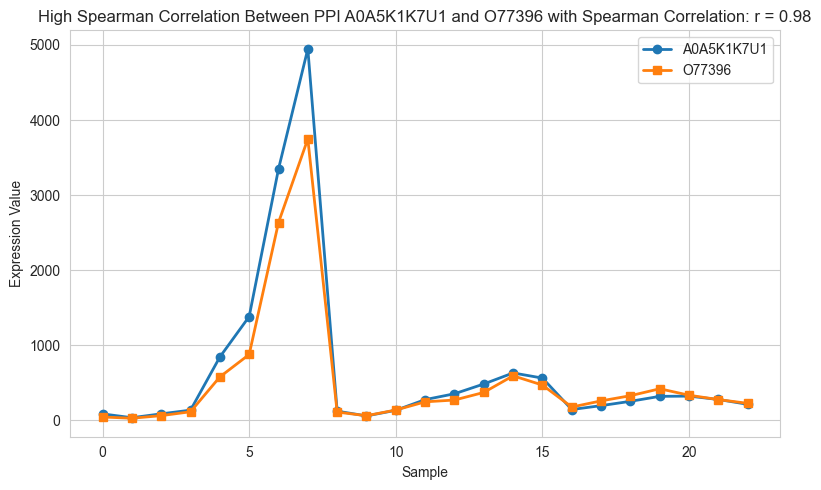

In [ ]:
gene_1 = all_df[all_df["Accession ID"] == "A0A5K1K7U1"].iloc[:,:-1]
gene_2 = all_df[all_df["Accession ID"] == "O77396"].iloc[:,:-1]
corr = pairs_correlation_df[(pairs_correlation_df["Protein1"] == "A0A5K1K7U1") & (pairs_correlation_df["Protein2"] == "O77396")]["Spearman_all"].values[0]

time_points = list(range(23))
# Plot
plt.figure(figsize=(6, 5))
# plt.scatter(gene_1, gene_2, color='teal', s=60)
plt.figure(figsize=(8, 5))
plt.plot(time_points, gene_1.values[0], marker='o', label='A0A5K1K7U1', linewidth=2)
plt.plot(time_points, gene_2.values[0], marker='s', label='O77396', linewidth=2)

plt.title(f"High Spearman Correlation Between PPI A0A5K1K7U1 and O77396 with Spearman Correlation: r = {corr:.2f}")
plt.xlabel("Sample")
plt.ylabel("Expression Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/high_spearman_pair.png",)
plt.show()


In [59]:
pearson_ks = stats.kstest(pairs_correlation_df["Pearson_all"], nonpairs_correlation_df["Pearson_all"])
print("Pearson statistic: \t", pearson_ks[0])
print("Pearson p-value: \t", pearson_ks[1])

Pearson statistic: 	 0.25563359581637346
Pearson p-value: 	 3.688492534765421e-131


In [60]:
def get_pair_expression_difference(protein1, protein2, rnaseq_data):
    accessions = rnaseq_data["Accession ID"]
    # Get the mean expression level for each protein across all samples
    expression_p1 = rnaseq_data[accessions.isin([protein1])].iloc[0,:-1].mean()
    expression_p2 = rnaseq_data[accessions.isin([protein2])].iloc[0,:-1].mean()
    
    # Return absolute difference in expression means
    return abs(expression_p1 - expression_p2)

# Compute the metric for protein pairs in the network
# network_differences = []
# for index, row in interaction_pairs.iterrows():
#     p1, p2 = row['Protein1'], row['Protein2']
#     if p1 in blood_df["Accession ID"].values and p2 in blood_df["Accession ID"].values:
#         difference = get_pair_expression_difference(p1, p2, blood_df)
#         network_differences.append(difference)

In [61]:
# # Perform the Kolmogorov-Smirnov test to check if the distribution follows a normal distribution
# ks_stat_norm, p_value_norm = stats.kstest(network_differences, 'norm', args=(np.mean(network_differences), np.std(network_differences)))

# # Perform the Kolmogorov-Smirnov test to check if the distribution follows a uniform distribution
# ks_stat_uniform, p_value_uniform = stats.kstest(network_differences, 'uniform', args=(min(network_differences), max(network_differences) - min(network_differences)))

# # Output the results
# print(f"KS Statistic (Normal): {ks_stat_norm}, P-Value (Normal): {p_value_norm}")
# print(f"KS Statistic (Uniform): {ks_stat_uniform}, P-Value (Uniform): {p_value_uniform}")

# # Interpretation: If p-value is low (e.g., < 0.05), the data does not follow the specified distribution
# if p_value_norm < 0.05:
#     print("The expression differences do not follow a normal distribution.")
# else:
#     print("The expression differences follow a normal distribution.")

# if p_value_uniform < 0.05:
#     print("The expression differences do not follow a uniform distribution.")
# else:
#     print("The expression differences follow a uniform distribution.")

In [62]:
# blood_df[blood_df["Accession ID"].isin([p1])].iloc[0,:-1].mean()

In [63]:
from typing import Set, Dict, List
class Cluster:
    elements: Set[str]
    
    def __init__(self, item):
        self.elements = set()
        if type(item) == str:
            self.elements.add(item)
        elif type(item) == list:
            self.elements.update(item)
        else:
            raise TypeError("Must be a list or string")
      
    def add(self, item: str) -> None:
        self.elements.add(item)
        
    def get_items(self) -> Set[str]:
        return self.elements

    def __str__(self) -> str:
        return str(self.elements)
    
    def __len__(self) -> int:
        return len(self.elements)
    
    def __repr__(self):
        return f"Cluster({self.elements})"
    
    def __getitems__(self):
        return self.elements


class ClusterOrganizer:
    clusters: Dict[int, Cluster]
    
    def __init__(self):
        self.clusters = {}
        
    def add_clusters(self, gene, cluster_nums: List[int]):
        if type(cluster_nums) != list:
            TypeError(f"{gene} has none for cluster_nums")
        for cluster_num in cluster_nums:
            if cluster_num not in self.clusters.keys():
                self.clusters[cluster_num] = Cluster(gene)
            else:
                self.clusters[cluster_num].add(gene)
                

    def get_cluster(self, cluster_num):
        return self.clusters[cluster_num]
    
    def get_all(self):
        return self.clusters
    
    def __in__(self, cluster_num: int):
        return cluster_num in self.clusters.keys()
    
    def __str__(self):
        res = "{\n"
        for k in self.clusters.keys():
            res += f"  {k}: \t{str(self.clusters[k])}\n"
        res += "}"
        return res
    
    def __repr__(self):
        return f"ClusterOrganizer({self.clusters})"
    
    def __getitem__(self, index):
        return self.clusters[index]
    

In [64]:
clusters = ClusterOrganizer()

for i, row in s5_network_df.iterrows():
    p1 = row["Protein1"]
    p2 = row["Protein2"]

    p1_clusters = row["Protein_1_clusters"]
    p2_clusters = row["Protein_2_clusters"]
    
    clusters.add_clusters(p1, p1_clusters)
    clusters.add_clusters(p2, p2_clusters)

In [65]:
for i, row in s5_network_df.iterrows():
    p1 = row["Protein1"]
    p2 = row["Protein2"]

    p1_clusters = row["Protein_1_clusters"]
    p2_clusters = row["Protein_2_clusters"]
    assert type(p2_clusters) != str

In [66]:
# validating cluster data is clean
print("number of na values for protein 1 clusters: ", sum(s5_network_df["Protein_1_clusters"].isna()))
print("number of na values for protein 2 clusters: ", sum(s5_network_df["Protein_2_clusters"].isna()))

number of na values for protein 1 clusters:  0
number of na values for protein 2 clusters:  0


In [67]:
clust = clusters.get_all()

In [68]:
numbers = clust.keys()
proteins = clust.values()
cluster_df = pd.DataFrame({"Number": numbers, 
                           "Proteins": proteins})
print(cluster_df.head())
cluster_df.sort_values(by=["Number"], axis=0, inplace=True)
cluster_df.set_index("Number", drop=False, inplace=True)

   Number                                           Proteins
0       5  {'A0A5K1K7U1', 'C0H4C7', 'O96220', 'Q8I0U7', '...
1       2  {'Q8IM10', 'O97285', 'Q8IJX8', 'Q9TY99', 'Q8II...
2      59  {'Q8IM15', 'Q8I0V2', 'A0A5K1K8W5', 'Q8I2X3', '...
3      28  {'Q8I467', 'Q8I3A1', 'P61074', 'C0H4U4', 'Q7KQ...
4      66  {'Q8I3A1', 'P61074', 'Q8II42', 'C6S3I6', 'Q8II...


In [69]:
clusters

ClusterOrganizer({5: Cluster({'A0A5K1K7U1', 'C0H4C7', 'O96220', 'Q8I0U7', 'Q8IBR6', 'Q8IKC9', 'Q8IK90', 'Q8IDG2', 'Q7K6A9', 'O97282', 'Q8IBI3', 'O77323', 'Q8II82', 'Q8IJA0', 'Q8IJN9', 'Q8IIJ6', 'Q8I5C4', 'O77396', 'Q8IDG3', 'Q8IAR3', 'A0A5K1K9F3', 'C0H5I7', 'C6KST5', 'Q8IJT1', 'O96153', 'Q8I261', 'C6KT34', 'Q8I6T3', 'Q8II43', 'O97247', 'Q8IDZ8', 'Q8IJM0', 'Q8II71', 'Q8IJW0', 'C6KST3'}), 2: Cluster({'Q8IM10', 'O97285', 'Q8IJX8', 'Q9TY99', 'Q8IIM8', 'Q8IB24', 'Q8IL58', 'Q8IE10', 'O97313', 'Q8IDN6', 'Q8IJC6', 'C6KT18', 'A0A5K1K8V8', 'C0H4A6', 'Q6ZMA8', 'C6KT19', 'Q8IEQ1', 'Q8ID28', 'Q8IDR9', 'Q8IK15', 'Q8I431', 'Q8IIU8', 'Q8IAX8', 'Q8IKM5', 'C6KT25', 'Q8IJ34', 'Q8IKW5', 'Q8IIV2', 'Q8IJM9', 'Q8ILK3', 'Q8IAX5', 'Q8IEK3', 'Q8I4U5', 'Q8IDK7', 'O00806', 'Q8I0V2', 'O97249', 'Q8IKR1', 'Q8IKX4', 'C0H4L1', 'Q8ILI2', 'Q6ZMA7', 'Q8IL02', 'Q8IIA2', 'Q8IIV1', 'Q8IAX6', 'Q8I5H4', 'O77381', 'Q8IDB0', 'Q8IET7', 'Q8I487', 'Q8I3R0', 'Q8IBV7', 'Q8I0P6', 'Q8IIB4', 'Q8II61', 'Q8IBY4', 'Q8IJV6', 'K7NTP5', 'Q8I

In [70]:
cluster_df[cluster_df["Number"] == 5]

,Number,Proteins
Number,,
5,5,"{'A0A5K1K7U1', 'C0H4C7', 'O96220', 'Q8I0U7', '..."


In [71]:
def cluster_combinations(cluster_df, protein_col, clust_num):
    cluster = cluster_df[cluster_df["Number"] == clust_num][protein_col].values[0].get_items()
    combos = combinations(cluster, 2)
    combos = set(combos)
    combos = pd.DataFrame(combos, columns=["Protein1", "Protein2"])
    return combos

def calculate_avg_spearman(cluster_pair_df, rnaseq_df):
    cluster_pair_df["spearman"] = cluster_pair_df.apply(compute_row_spearman, args=(rnaseq_df,), axis=1)
    return cluster_pair_df["spearman"].mean()

def row_spearman_avg(row):
    row["Proteins"]
    cluster_combinations(row, "Proteins", )

In [72]:
cluster_df

,Number,Proteins
Number,,
0,0,"{'O96230', 'Q8IKB2', 'C0H5H0', 'C0H4Y6', 'Q8I2..."
1,1,"{'Q8IDZ9', 'Q8ILP6', 'Q8IIW2', 'Q8IIA4', 'Q8IB..."
2,2,"{'Q8IM10', 'O97285', 'Q8IJX8', 'Q9TY99', 'Q8II..."
3,3,"{'Q8IDS0', 'Q8IEP9', 'Q76NM6', 'Q8I2H3', 'Q8I2..."
4,4,"{'Q8I3J0', 'Q8ILI6', 'Q8I5H2', 'Q8IIR7', 'C0H4..."
...,...,...
79,79,"{'Q8II64', 'Q8I305'}"
80,80,"{'Q8IK89', 'O97306', 'Q8I3S3', 'Q8ILZ7'}"
81,81,"{'Q8IAM2', 'Q7KQL8', 'Q8IL80', 'Q9NLB2'}"


In [73]:
# testing with one cluster
cluster_0_df = cluster_combinations(cluster_df, "Proteins", 0)
cluster_0_df["spearman"] = cluster_0_df.apply(compute_row_spearman, args=(all_df,), axis=1)
print(cluster_0_df["spearman"].mean())

0.500197628458498


In [74]:
cluster_df[cluster_df["Number"] == 0]["Proteins"].values[0].get_items()

{'C0H4Y6', 'C0H5H0', 'O96230', 'Q8I2V9', 'Q8IIV8', 'Q8IKB2'}

In [75]:
cluster_0_df = cluster_df[cluster_df["Number"] == 0]["Proteins"]
combos = combinations(cluster_0_df.values[0].get_items(), 2)
combos = set(combos)
combos = pd.DataFrame(combos, columns=["Protein1", "Protein2"])
# return combos

In [76]:
# calculate average spearman for each
vals = []
for clust_num in list(cluster_df["Number"]):
    tmp = cluster_combinations(cluster_df, "Proteins", clust_num)
    tmp["spearman"] = tmp.apply(compute_row_spearman, args=(all_df,), axis=1)
    x = tmp["spearman"].mean()
    tmp = None
    vals.append(x)
cluster_df["avg_spearman"] = vals

In [77]:
cluster_df

,Number,Proteins,avg_spearman
Number,,,
0,0,"{'O96230', 'Q8IKB2', 'C0H5H0', 'C0H4Y6', 'Q8I2...",0.500198
1,1,"{'Q8IDZ9', 'Q8ILP6', 'Q8IIW2', 'Q8IIA4', 'Q8IB...",0.873057
2,2,"{'Q8IM10', 'O97285', 'Q8IJX8', 'Q9TY99', 'Q8II...",0.516712
3,3,"{'Q8IDS0', 'Q8IEP9', 'Q76NM6', 'Q8I2H3', 'Q8I2...",0.734660
4,4,"{'Q8I3J0', 'Q8ILI6', 'Q8I5H2', 'Q8IIR7', 'C0H4...",0.411491
...,...,...,...
79,79,"{'Q8II64', 'Q8I305'}",0.518775
80,80,"{'Q8IK89', 'O97306', 'Q8I3S3', 'Q8ILZ7'}",0.615119
81,81,"{'Q8IAM2', 'Q7KQL8', 'Q8IL80', 'Q9NLB2'}",0.670455


In [78]:
cluster_df[cluster_df["avg_spearman"] < 0]

,Number,Proteins,avg_spearman
Number,,,
51,51,"{'Q8I487', 'A0A143ZX41'}",-0.075099


In [79]:
from typing import Iterable
import random
def create_cluster(size: int, proteins: Iterable):
    """Create a cluster from proteins with size. Adds each protein only once

    Args:
        size (int): size of the desired cluster
        proteins (Iterable): iterable proteins to add to cluster
    """
    return random.sample(proteins, size)
    

In [80]:
unique_genes = list(G.nodes)
create_cluster(10, unique_genes)

['O97285',
 'Q8I3A1',
 'Q8IAU7',
 'Q8I320',
 'Q8I467',
 'Q8I0V2',
 'Q8II72',
 'Q6ZMA8',
 'O96221',
 'Q8IM15']

In [81]:
# want to go through all clusters, 
# make 100 random clusters of that size,
# then do spearman analysis on it,
# calculate avg spearman,
# add to table

cluster_df["size"] = cluster_df["Proteins"].apply(len)

In [82]:
def test_random_cluster():
    return

# pass in cluster_df -> new column with avg spearman of 100 random runs

# pass in (size, set of proteins, number of clusters) -> create number of clusters of size sampling randomly from set of proteins
def sample(sample_size, population, num_samples=100, test_df=all_df) -> float:
    """Runs sample run of spearman correlation coefficients for clusters across num_samples runs 
    on clusters of size sample_size sampled from population.

    Args:
        sample_size (int): size of cluster
        population (Iterable): population to sample from
        num_samples (int): number of samples to do run on (default 100)

    Returns:
        float: average spearman correlation coefficient across all samples
    """
    # create num_samples clusters of size sample_size from population
    sum = 0
    for i in range(num_samples):
        cluster = create_cluster(sample_size, population)
        # print(cluster)
        pairs = combinations(cluster, 2)
        tmp_df = pd.DataFrame(pairs, columns=["Protein1", "Protein2"])
        # print(tmp_df.head())
        tmp_df["spearman"] = tmp_df.apply(compute_row_spearman, args=[test_df], axis=1)
        mean = float(tmp_df["spearman"].mean())
        sum += mean
    return sum/num_samples

In [83]:
sample(6, unique_genes, 100)

0.3992744795067734

In [84]:
"""
['Q8IE67', 'O97306', 'Q8IIF0', 'Q8I5Q3', 'Q8IDN6', 'Q8IJ34']
['Q8II61', 'O96230', 'Q76NM6', 'Q76NM4', 'Q8I261', 'Q8IJ76']
['Q8IJF6', 'C0H551', 'Q8ILZ7', 'Q8IKA6', 'Q8IJN7', 'Q8IKC9']
"""
sum = float(0)
ex_cluster = clusters[1].get_items()
cluster = create_cluster(len(ex_cluster), unique_genes)
print(cluster)
pairs = combinations(cluster, 2)
lst = []
for pair in pairs:
    lst.append(pair)
tmp_df = pd.DataFrame(lst, columns=["Protein1", "Protein2"])
print(tmp_df.head())
tmp_df["spearman"] = tmp_df.apply(compute_row_spearman, args=[all_df], axis=1)
mean = tmp_df["spearman"].mean()
print(mean)
sum += mean

['Q8IM55', 'Q8IIK8', 'Q8IJF6', 'Q8I2W3', 'Q8I566', 'O77323']
  Protein1 Protein2
0   Q8IM55   Q8IIK8
1   Q8IM55   Q8IJF6
2   Q8IM55   Q8I2W3
3   Q8IM55   Q8I566
4   Q8IM55   O77323
0.41152832674571804


In [85]:
cluster_df.sort_values("size", ascending=False)

,Number,Proteins,avg_spearman,size
Number,,,,
2,2,"{'Q8IM10', 'O97285', 'Q8IJX8', 'Q9TY99', 'Q8II...",0.516712,65
5,5,"{'A0A5K1K7U1', 'C0H4C7', 'O96220', 'Q8I0U7', '...",0.800470,35
13,13,"{'Q8I476', 'Q9TY99', 'Q8IBB9', 'Q8IIF0', 'Q8II...",0.199703,22
12,12,"{'Q8IKT2', 'Q7KQL9', 'Q8IFP3', 'C6KTA3', 'C0H5...",0.592856,17
18,18,"{'C0H4V6', 'Q8ILI6', 'Q8I5H2', 'Q76NM3', 'Q8II...",0.516304,9
...,...,...,...,...
51,51,"{'Q8I487', 'A0A143ZX41'}",-0.075099,2
45,45,"{'Q8I2Q0', 'Q8ILE3'}",0.639328,2
43,43,"{'Q8IM16', 'Q8IM15'}",0.413043,2


In [86]:
lst = []
for i in cluster_df["Number"].values:
    lst.append(sample(len(clusters[i]), unique_genes, 100))


In [87]:
cluster_df["avg_spearman_random"] = lst

In [88]:
cluster_df["significant"] = cluster_df["avg_spearman_random"] < cluster_df["avg_spearman"]
cluster_df["large"] = cluster_df["size"] > 2

In [89]:
filtered_cluster_df = cluster_df[cluster_df["avg_spearman_random"] < cluster_df["avg_spearman"]]

In [90]:
len(filtered_cluster_df[filtered_cluster_df["size"] > 2])

60

In [91]:
pairs_correlation_df.sort_values("Spearman_all", ascending=False)

,Protein1,Protein2,Spearman_all,Pearson_all
1424,Q8ILL3,Q8IM10,0.996047,0.999172
1198,O97313,Q8IJC6,0.994071,0.996797
523,Q8IBY4,Q8IKM5,0.993083,0.994700
1857,O77396,Q8IKC9,0.993083,0.995565
25,A0A5K1K7U1,Q8IDG2,0.992095,0.988210
...,...,...,...,...
2053,Q8IDR9,Q8IK83,-0.546443,-0.445453
1378,A0A5K1K9E5,Q8IDR9,-0.569170,-0.341872
1783,Q76NN6,Q8IE66,-0.569170,-0.143485
1702,Q8I0U8,Q8I2F2,-0.620553,-0.341463


In [92]:
cluster_df[cluster_df["Number"] == 5]

,Number,Proteins,avg_spearman,size,avg_spearman_random,significant,large
Number,,,,,,,
5,5,"{'A0A5K1K7U1', 'C0H4C7', 'O96220', 'Q8I0U7', '...",0.80047,35,0.395561,True,True


In [93]:
filtered_cluster_df.drop("Number", axis=1).sort_values("avg_spearman", ascending=False).head(20)

,Proteins,avg_spearman,size,avg_spearman_random,significant,large
Number,,,,,,
76,"{'Q8IM38', 'Q8IJN8'}",0.948617,2,0.386200,True,False
66,"{'Q8I3A1', 'P61074', 'Q8II42', 'C6S3I6', 'Q8II...",0.940508,5,0.383210,True,True
55,"{'Q8ILF4', 'Q8ILF6'}",0.934783,2,0.412430,True,False
30,"{'C0H4C7', 'Q8I3Y6', 'Q8IBZ4', 'Q8I3A4', 'Q8II...",0.879400,7,0.395047,True,True
1,"{'Q8IDZ9', 'Q8ILP6', 'Q8IIW2', 'Q8IIA4', 'Q8IB...",0.873057,6,0.384568,True,True
36,"{'Q8I3A1', 'C6S3I6', 'Q8II42', 'Q8I5Q3'}",0.838632,4,0.419211,True,True
34,"{'Q8IKW0', 'Q8IK83', 'Q8IM24', 'Q8IKS0'}",0.814394,4,0.380889,True,True
5,"{'A0A5K1K7U1', 'C0H4C7', 'O96220', 'Q8I0U7', '...",0.800470,35,0.395561,True,True
19,"{'A0A143ZY58', 'Q8I1S0', 'Q8IM66', 'Q8IKH3'}",0.796937,4,0.388856,True,True


In [94]:
cluster_df.drop("Number", axis=1).to_csv("data/generated_tables/s5_network.tsv", sep="\t")

In [95]:
list(filtered_cluster_df[filtered_cluster_df["Number"] == 5]["Proteins"])

[Cluster({'A0A5K1K7U1', 'C0H4C7', 'O96220', 'Q8I0U7', 'Q8IBR6', 'Q8IKC9', 'Q8IK90', 'Q8IDG2', 'Q7K6A9', 'O97282', 'Q8IBI3', 'O77323', 'Q8II82', 'Q8IJA0', 'Q8IJN9', 'Q8IIJ6', 'Q8I5C4', 'O77396', 'Q8IDG3', 'Q8IAR3', 'A0A5K1K9F3', 'C0H5I7', 'C6KST5', 'Q8IJT1', 'O96153', 'Q8I261', 'C6KT34', 'Q8I6T3', 'Q8II43', 'O97247', 'Q8IDZ8', 'Q8IJM0', 'Q8II71', 'Q8IJW0', 'C6KST3'})]

In [96]:
pairs_correlation_df[pairs_correlation_df["Protein1"] == "Q8IE67"]

,Protein1,Protein2,Spearman_all,Pearson_all
28,Q8IE67,Q8IIR8,0.008893,0.762303


In [97]:
def find_weakest_pair(cluster_num, cluster_df, pairs_df):
    cluster = list(cluster_df[cluster_df["Number"] == cluster_num]["Proteins"].values[0].get_items())
    weakest = 1
    weakest_pair = None
    for i, row in pairs_df.iterrows():
        if row["Protein1"] in cluster and row["Protein2"] in cluster:
            if row["Spearman_all"] < weakest:
                weakest = row["Spearman_all"]
                weakest_pair = row
    return weakest_pair

In [98]:
find_weakest_pair(5, cluster_df, pairs_correlation_df)

Protein1          C0H5I7
Protein2          Q8IJW0
Spearman_all    0.229249
Pearson_all     0.654423
Name: 2112, dtype: object

In [99]:
s5_network_df[s5_network_df["Protein1"] == "Q8IDG3"]

,index,Protein1,Protein2,Score,Description1,Description2,Protein_1_clusters,Protein_2_clusters,Any Matching Go-Terms?,Train/Val/Test,Experimental P. Falciparum,P. Falciparum,P. Knowlesi,P. Berghei,P. Vivax,P. Yoelii,C. parvum,B. bovis
444,444,Q8IDG3,Q8IKC9,0.602389,Proteasome subunit alpha type,Proteasome subunit beta,[5],[5],1,1,1,1,1,1,1,1,1,1
554,554,Q8IDG3,Q8IJM0,0.896348,Proteasome subunit alpha type,"26S proteasome regulatory subunit p55, putative",[5],"[5, 15]",1,1,1,1,1,1,1,1,1,1
609,609,Q8IDG3,Q8IJA0,0.707226,Proteasome subunit alpha type,"26S proteasome regulatory subunit RPN9, putative",[5],[5],1,1,1,1,1,1,1,1,1,1
677,677,Q8IDG3,Q8II43,0.606255,Proteasome subunit alpha type,T-complex protein 1 subunit alpha,[5],[5],0,0,0,0,0,0,0,0,0,0
1135,1135,Q8IDG3,Q8IK90,0.541839,Proteasome subunit alpha type,"Proteasome subunit alpha type-1, putative",[5],[5],1,1,1,1,1,1,1,1,1,0
1310,1310,Q8IDG3,Q8II71,0.985297,Proteasome subunit alpha type,"26S proteasome regulatory subunit RPN7, putative",[5],[5],1,1,1,1,1,1,1,1,1,1
1423,1423,Q8IDG3,Q8IJT1,0.757242,Proteasome subunit alpha type,Proteasome subunit beta,[5],[5],1,1,1,1,1,1,1,1,1,1
1996,1996,Q8IDG3,Q8IJW0,0.547170,Proteasome subunit alpha type,"26S protease regulatory subunit 4, putative",[5],[5],1,1,1,1,1,1,1,1,1,1


In [100]:
aliases= pd.read_csv("data/GenesByTaxon_Alias.csv")
# merge on common column Gene ID
essentiality_df = essentiality_df.merge(aliases, on="Gene ID")
# take inner join of df and network_df to get aliases only found in network_df
essentiality_df = essentiality_df.merge(network_df["Accession ID"], left_on=["Name/ID/Alias"], right_on=["Accession ID"])
essentiality_df.drop(["Type", "Source", "Name/ID/Alias", "Gene ID", "source_id"], axis=1, inplace=True)

In [101]:
lst = []
for i in cluster_df["Number"]:
    for p in cluster_df[cluster_df["Number"] == i]["Proteins"].values[0].get_items():
        lst.append(p)

<Figure size 600x500 with 0 Axes>

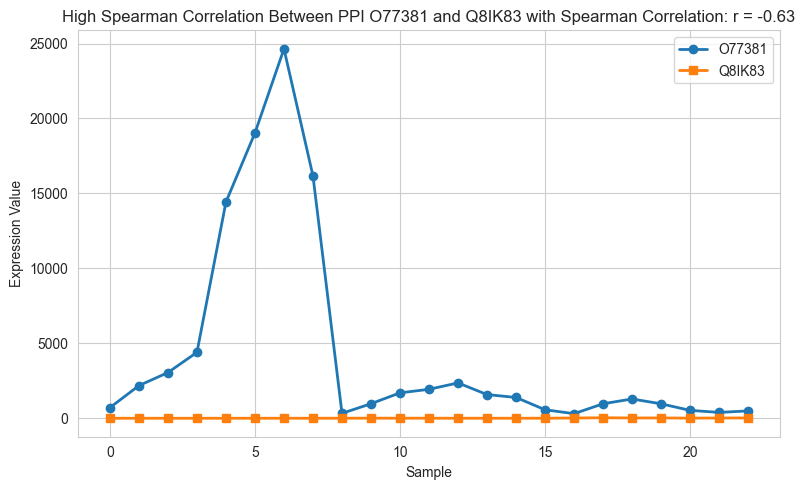

In [ ]:
gene_1 = all_df[all_df["Accession ID"] == "O77381"].iloc[:,:-1]
gene_2 = all_df[all_df["Accession ID"] == "Q8IK83"].iloc[:,:-1]
corr = pairs_correlation_df[(pairs_correlation_df["Protein1"] == "O77381") & (pairs_correlation_df["Protein2"] == "Q8IK83")]["Spearman_all"].values[0]

time_points = list(range(23))
# Plot
plt.figure(figsize=(6, 5))
# plt.scatter(gene_1, gene_2, color='teal', s=60)
plt.figure(figsize=(8, 5))
plt.plot(time_points, gene_1.values[0], marker='o', label='O77381', linewidth=2)
plt.plot(time_points, gene_2.values[0], marker='s', label='Q8IK83', linewidth=2)

plt.title(f"High Spearman Correlation Between PPI O77381 and Q8IK83 with Spearman Correlation: r = {corr:.2f}")
plt.xlabel("Sample")
plt.ylabel("Expression Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/low_spearman_pair.png",)
plt.show()


In [107]:
all_df[all_df["Accession ID"] == "Q8IK83"].iloc[:,:-1]

,scaled sense - 40-5 hours post-invasion - unique only,scaled sense - 2-10 hours post-invasion - unique only,scaled sense - 7-15 hours post-invasion - unique only,scaled sense - 12-20 hours post-invasion - unique only,scaled sense - 17-25 hours post-invasion - unique only,scaled sense - 22-30 hours post-invasion - unique only,scaled sense - 27-35 hours post-invasion - unique only,scaled sense - 32-40 hours post-invasion - unique only,sense - T05 - unique only,sense - T10 - unique only,...,sense - T30 - unique only,sense - T35 - unique only,sense - T40 - unique only,3D7 2020 sense - 0hr 3D7 DAFT-seq - unique only,3D7 2020 sense - 8hr 3D7 DAFT-seq - unique only,3D7 2020 sense - 16hr 3D7 DAFT-seq - unique only,3D7 2020 sense - 24hr 3D7 DAFT-seq - unique only,3D7 2020 sense - 32hr 3D7 DAFT-seq - unique only,3D7 2020 sense - 40hr 3D7 DAFT-seq - unique only,3D7 2020 sense - 48hr 3D7 DAFT-seq - unique only
385,0.09,0.38,0.15,0.25,0.66,0.27,1.3,0.81,3.46,6.15,...,0.9,1.96,3.83,18.13,33.3,20.55,20.81,10.15,16.68,21.77


In [ ]:
pairs_correlation_df[(pairs_correlation_df["Protein1"] == "Q8I485") & (pairs_correlation_df["Protein2"] == "Q8IK07")]

,Protein1,Protein2,Spearman_all,Pearson_all
